<a href="https://colab.research.google.com/github/AlisaKri/DeepChemScripts/blob/master/RUL_estimation_with_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [118]:
import numpy as np
import pandas as pd

In [119]:
data = pd.read_csv('train_rul.csv',sep=",")

In [ ]:
#check no garbage in RUL
for index, row in data.iterrows():
  if data.at[index, 'RUL'] < 0:
    print(index)
    print(data.at[index, 'RUL'])

In [ ]:
min(RUL)

128.0

In [ ]:
data.columns

Index(['Unnamed: 0', 'Engine', 'Cycle', ' Setting 1', 'Setting 2', 'Setting 3',
       'Sensor 1', 'Sensor 2', 'Sensor 3', 'Sensor 4', 'Sensor 5', 'Sensor 6',
       'Sensor 7', 'Sensor 8', 'Sensor 9', 'Sensor 10', 'Sensor 11',
       'Sensor 12', 'Sensor 13', 'Sensor 14', 'Sensor 15', 'Sensor 16',
       'Sensor 17', 'Sensor 18', 'Sensor 19', 'Sensor 20', 'Sensor 21', 'RUL'],
      dtype='object')

In [120]:
data

,Unnamed: 0,Engine,Cycle,Setting 1,Setting 2,Setting 3,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 5,Sensor 6,Sensor 7,Sensor 8,Sensor 9,Sensor 10,Sensor 11,Sensor 12,Sensor 13,Sensor 14,Sensor 15,Sensor 16,Sensor 17,Sensor 18,Sensor 19,Sensor 20,Sensor 21,RUL
0,0,1,1,10.0047,0.2501,20,489.05,604.13,1499.45,1309.95,10.52,15.49,394.88,2318.87,8770.20,1.26,45.40,372.15,2388.13,8120.83,8.6216,0.03,368,2319,100.00,28.58,17.1735,130.0
1,1,1,2,0.0015,0.0003,100,518.67,642.13,1584.55,1403.96,14.62,21.61,553.67,2388.01,9045.76,1.30,47.29,521.81,2388.15,8132.87,8.3907,0.03,391,2388,100.00,38.99,23.3619,130.0
2,2,1,3,34.9986,0.8401,60,449.44,555.42,1368.17,1122.49,5.48,8.00,194.93,2222.86,8343.91,1.02,41.92,183.26,2387.95,8063.84,9.3557,0.02,334,2223,100.00,14.83,8.8555,130.0
3,3,1,4,20.0031,0.7005,0,491.19,607.03,1488.44,1249.18,9.35,13.65,334.82,2323.85,8721.53,1.08,44.26,314.84,2388.07,8052.30,9.2231,0.02,364,2324,100.00,24.42,14.7832,130.0
4,4,1,5,42.0041,0.8405,40,445.00,549.52,1354.48,1124.32,3.91,5.71,138.24,2211.80,8314.56,1.02,41.79,130.44,2387.89,8083.67,9.2986,0.02,330,2212,100.00,10.99,6.4025,130.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45913,45913,218,129,42.0066,0.8400,40,445.00,551.02,1365.27,1147.43,3.91,5.72,137.97,2211.33,8303.20,1.02,42.68,130.21,2387.39,8062.87,9.4672,0.02,333,2212,100.00,10.57,6.2985,4.0
45914,45914,218,130,42.0029,0.8415,40,445.00,550.07,1365.55,1142.21,3.91,5.71,137.56,2211.29,8302.69,1.02,42.62,130.24,2387.28,8062.05,9.4619,0.02,332,2212,100.00,10.40,6.2741,3.0
45915,45915,218,131,41.9999,0.8400,40,445.00,549.92,1359.21,1150.15,3.91,5.72,138.05,2211.24,8309.41,1.02,42.83,129.86,2387.33,8062.73,9.4827,0.02,334,2212,100.00,10.37,6.1978,2.0
45916,45916,218,132,35.0007,0.8419,60,449.44,556.55,1380.05,1145.49,5.48,8.00,194.59,2222.54,8330.67,1.02,42.61,182.03,2387.56,8043.21,9.4212,0.02,337,2223,100.00,14.70,8.6761,1.0


In [121]:
#build the RUL list
engine_old = 1
cycle_old = 1
RUL = []
for index, row in data.iterrows():
  engine = row['Engine']
  cycle = row['Cycle']
  if engine > engine_old :
    RUL.append(cycle_old)
    engine_old = engine
    cycle_old = cycle
  else:
    cycle_old = cycle
#add the last cycle to RUL
RUL.append(data['Cycle'].iloc[-1])





In [122]:
print(RUL)

[223.0, 164.0, 150.0, 159.0, 357.0, 225.0, 168.0, 276.0, 181.0, 228.0, 210.0, 242.0, 210.0, 147.0, 178.0, 172.0, 228.0, 196.0, 167.0, 154.0, 205.0, 203.0, 213.0, 191.0, 281.0, 210.0, 178.0, 278.0, 228.0, 200.0, 283.0, 193.0, 286.0, 286.0, 188.0, 147.0, 177.0, 287.0, 161.0, 187.0, 201.0, 241.0, 209.0, 233.0, 242.0, 277.0, 227.0, 227.0, 285.0, 223.0, 182.0, 212.0, 259.0, 249.0, 147.0, 162.0, 150.0, 147.0, 169.0, 300.0, 229.0, 238.0, 254.0, 154.0, 209.0, 190.0, 145.0, 204.0, 170.0, 175.0, 225.0, 235.0, 249.0, 192.0, 186.0, 128.0, 174.0, 228.0, 225.0, 284.0, 199.0, 223.0, 231.0, 206.0, 246.0, 205.0, 177.0, 134.0, 225.0, 190.0, 199.0, 207.0, 222.0, 209.0, 234.0, 339.0, 157.0, 206.0, 263.0, 213.0, 226.0, 222.0, 243.0, 178.0, 149.0, 189.0, 200.0, 230.0, 160.0, 277.0, 227.0, 226.0, 160.0, 197.0, 260.0, 232.0, 212.0, 188.0, 242.0, 170.0, 153.0, 237.0, 254.0, 197.0, 245.0, 241.0, 163.0, 159.0, 147.0, 143.0, 263.0, 199.0, 151.0, 173.0, 188.0, 232.0, 237.0, 181.0, 211.0, 210.0, 277.0, 215.0, 149.0

In [123]:
list_of_columns = []
for j in range(6,27):
  list_of_columns.append(data.columns[j])


In [124]:
print(list_of_columns)

['Sensor 1', 'Sensor 2', 'Sensor 3', 'Sensor 4', 'Sensor 5', 'Sensor 6', 'Sensor 7', 'Sensor 8', 'Sensor 9', 'Sensor 10', 'Sensor 11', 'Sensor 12', 'Sensor 13', 'Sensor 14', 'Sensor 15', 'Sensor 16', 'Sensor 17', 'Sensor 18', 'Sensor 19', 'Sensor 20', 'Sensor 21']


Let's try a simple network that learns in each step RUL from all the features

In [125]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers import InputLayer
from keras.layers import SimpleRNN
from keras.layers import TimeDistributed

(45918, 28)

In [126]:
#load dataset
from numpy import loadtxt
dataset = data.to_numpy()
X = dataset[:,2:27]
Y = dataset[:,27]

In [138]:
X[0,0]

1.0

In [127]:
#let's normalize this thing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler = scaler.fit(X)
#print('Min: %f, Max: %f' % (scaler.data_min_, scaler.data_max_))
# normalize the dataset and print
Xn = scaler.transform(X)
print(Xn)
# inverse transform and print
#inversed = scaler.inverse_transform(normalized)
#print(inversed)

[[-1.         -0.52367644 -0.40593824 ...  1.          0.26116838
   0.2651126 ]
 [-0.99438202 -0.99992859 -0.99928741 ...  1.          0.9766323
   0.97382028]
 [-0.98876404  0.66628261  0.99548694 ...  1.         -0.6838488
  -0.68748103]
 ...
 [-0.26966292  0.99961436  0.99524941 ...  1.         -0.99037801
  -0.99184604]
 [-0.26404494  0.66638259  0.99976247 ...  1.         -0.69278351
  -0.70802627]
 [-0.25842697  0.19058751  0.47648456 ... -1.         -0.72783505
  -0.72681932]]


In [162]:
Xn.shape

(45918, 25)

In [128]:
print(Y)

[130. 130. 130. ...   2.   1.   0.]


In [129]:
Xn.shape

(45918, 25)

In [133]:
samples = 0
for i in range(0,218):
  samples = samples + int(RUL[i])//15

print(samples)

2962


In [173]:
#need to reshape X into 3D: engine x cycle x sensor
#for fist step, keep it symmetrical and use the lowest number of cycles in dataset
#Y then becomes 

#max time steps can be 15 because that is what we have in testing:
time_steps = 15
#how many features do we have
features = 25
#how many samples can we generate

X_new=np.empty(shape=(samples,time_steps,features))
Y_new = np.empty(shape=(samples,time_steps))
#i would be number of engines
counter = 0
sample = 0
for i in range(0,218):
  print('i=',i)
  # j would be number of cycles
  #decide how many times we're going to do this
  print(counter)
  cycles = int(RUL[data.at[counter,'Engine']-1])//15
  print('RUL=',int(RUL[data.at[counter,'Engine']-1]))
  print('cycles=',cycles)
  counter0 = counter
  for cycle in range(0,cycles):
    
    
    for j in range(0,time_steps):
    #print('j=',j)
    #k would be number of sensors
      for k in range(0,features):
      #print('k=',k)
      #print('counter',counter)
        X_new[sample,j,k]=Xn[counter,k]
        Y_new[sample,j] = Y[counter]
    ##calculate step
   

    
      if (j == time_steps-1 and cycle == cycles-1):
        counter = counter0 + int(RUL[data.at[counter,'Engine']-1])
      else:
        counter = counter + 1
    sample = sample + 1

i= 0
0
RUL= 223
cycles= 14
i= 1
223
RUL= 164
cycles= 10
i= 2
387
RUL= 150
cycles= 10
i= 3
537
RUL= 159
cycles= 10
i= 4
696
RUL= 357
cycles= 23
i= 5
1053
RUL= 225
cycles= 15
i= 6
1278
RUL= 168
cycles= 11
i= 7
1446
RUL= 276
cycles= 18
i= 8
1722
RUL= 181
cycles= 12
i= 9
1903
RUL= 228
cycles= 15
i= 10
2131
RUL= 210
cycles= 14
i= 11
2341
RUL= 242
cycles= 16
i= 12
2583
RUL= 210
cycles= 14
i= 13
2793
RUL= 147
cycles= 9
i= 14
2940
RUL= 178
cycles= 11
i= 15
3118
RUL= 172
cycles= 11
i= 16
3290
RUL= 228
cycles= 15
i= 17
3518
RUL= 196
cycles= 13
i= 18
3714
RUL= 167
cycles= 11
i= 19
3881
RUL= 154
cycles= 10
i= 20
4035
RUL= 205
cycles= 13
i= 21
4240
RUL= 203
cycles= 13
i= 22
4443
RUL= 213
cycles= 14
i= 23
4656
RUL= 191
cycles= 12
i= 24
4847
RUL= 281
cycles= 18
i= 25
5128
RUL= 210
cycles= 14
i= 26
5338
RUL= 178
cycles= 11
i= 27
5516
RUL= 278
cycles= 18
i= 28
5794
RUL= 228
cycles= 15
i= 29
6022
RUL= 200
cycles= 13
i= 30
6222
RUL= 283
cycles= 18
i= 31
6505
RUL= 193
cycles= 12
i= 32
6698
RUL= 286
cycles

In [174]:
X_new.shape

(2962, 15, 25)

In [190]:
Y_new[13,:]

array([27., 26., 25., 24., 23., 22., 21., 20., 19., 18., 17., 16., 15.,
       14., 13.])

In [191]:
X_new[0,:,0]

array([-1.        , -0.99438202, -0.98876404, -0.98314607, -0.97752809,
       -0.97191011, -0.96629213, -0.96067416, -0.95505618, -0.9494382 ,
       -0.94382022, -0.93820225, -0.93258427, -0.92696629, -0.92134831])

In [192]:
Y_new.shape

(2962, 15)

In [193]:
print(Y_new[0])

[130. 130. 130. 130. 130. 130. 130. 130. 130. 130. 130. 130. 130. 130.
 130.]


In [ ]:
x = np.array([[1,1,2,3],[1,2,4,5],[2,1,2,3],[2,2,4,6]])

In [ ]:
print(x)

[[1 1 2 3]
 [1 2 4 5]
 [2 1 2 3]
 [2 2 4 6]]


In [ ]:
np.shape(x)

(4, 4)

In [ ]:
b=np.empty(shape=(2,2,3))
#i would be number of engines
counter = 0
for i in range(0,2):
  print('i=',i)
  # j would be number of cycles
  for j in range(0,2):
    print('j=',j)
    #k would be number of sensors
    for k in range(0,3):
      print('k=',k)
      print('counter',counter)
      b[i,j,k]=x[counter,k+1]
    counter = counter + 1

In [ ]:
np.shape(b)

(2, 2, 3)

In [ ]:
print(b)

[[[1. 2. 3.]
  [2. 4. 5.]]

 [[1. 2. 3.]
  [2. 4. 6.]]]


In [194]:
 from sklearn.model_selection import train_test_split
#split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_new, Y_new, test_size=0.33)

In [195]:
X_train.shape

(1984, 15, 25)

In [196]:
#let's try to make it classification and make a one-hot encoding of the RUL between 0 and 130:
from keras.utils.np_utils import to_categorical
RUL_tags = to_categorical(y_train,131)
RUL_tags_test = to_categorical(y_test,131)


In [ ]:
X_train.shape[2]

25

In [197]:
RUL_tags.shape

(1984, 15, 131)

In [198]:
#build model

model = Sequential()
model.add(InputLayer(input_shape=(time_steps,features)))
#model.add(SimpleRNN(64,return_sequences=True))
#model.add(SimpleRNN(32,return_sequences=True))
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))


#add top layer that predicts the RUL distribution


#stepwise_dense = Dense(131,activation='softmax')
#stepwise_dense = TimeDistributed(stepwise_dense)
#model.add(stepwise_dense)
model.add(Dense(131,activation='softmax'))
#model.add(Dense(32,activation='relu'))
#model.add(Dense(1,activation='linear'))

In [199]:
model.compile('adam','categorical_crossentropy')


In [200]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 15, 50)            15200     
_________________________________________________________________
dense_2 (Dense)              (None, 15, 131)           6681      
Total params: 21,881
Trainable params: 21,881
Non-trainable params: 0
_________________________________________________________________


In [215]:
model.fit(X_train,RUL_tags,batch_size=20,epochs=50)

Epoch 1/50
100/100 [==============================] - 1s 11ms/step - loss: 2.9096
Epoch 2/50
100/100 [==============================] - 1s 11ms/step - loss: 2.9064
Epoch 3/50
100/100 [==============================] - 1s 10ms/step - loss: 2.8969
Epoch 4/50
100/100 [==============================] - 1s 11ms/step - loss: 2.8928
Epoch 5/50
100/100 [==============================] - 1s 11ms/step - loss: 2.8942
Epoch 6/50
100/100 [==============================] - 1s 11ms/step - loss: 2.8863
Epoch 7/50
100/100 [==============================] - 1s 11ms/step - loss: 2.8708
Epoch 8/50
100/100 [==============================] - 1s 11ms/step - loss: 2.8714
Epoch 9/50
100/100 [==============================] - 1s 11ms/step - loss: 2.8734
Epoch 10/50
100/100 [==============================] - 1s 12ms/step - loss: 2.8785
Epoch 11/50
100/100 [==============================] - 1s 12ms/step - loss: 2.8833
Epoch 12/50
100/100 [==============================] - 1s 12ms/step - loss: 2.8610
Epoch 13/50
1

In [216]:
model.evaluate(X_test,RUL_tags_test)

31/31 [==============================] - 0s 6ms/step - loss: 2.9501


2.950075387954712

In [203]:
y_new = model.predict(X_test)

In [210]:
y_new.shape

(978, 15, 131)

In [211]:
y_train.shape

(1984, 15)

In [212]:
X_train.shape

(1984, 15, 25)

In [217]:
predicted_RUL_test = np.zeros((y_new.shape[0],time_steps))
for i in range(0,y_new.shape[0]):
  for j in range(0,time_steps):
    predicted_RUL_test[i,j] = np.argmax(y_new[i,j,:])

In [222]:
predicted_RUL_test[1:15,:]

array([[130., 130., 130.,  37.,  53.,  71., 130., 130., 130., 130., 130.,
        130., 130., 130., 130.],
       [130., 130., 130., 130., 130., 130., 130., 130., 130., 130., 130.,
        130., 130., 130., 130.],
       [130., 130., 130., 130., 130., 130., 130., 130., 130., 130., 130.,
        130., 130., 130., 130.],
       [130.,  39.,  39.,  39.,  35.,  40.,  40.,  40.,  40.,  30.,  30.,
         30.,  30.,  27.,  28.],
       [130., 130., 130., 130., 130., 130., 130., 130., 130., 130., 130.,
        130., 130., 130., 130.],
       [130.,  15.,  17.,  17.,  14.,  13.,  13.,  13.,  13.,  13.,  39.,
         32.,  29.,  13.,  13.],
       [130., 130., 130., 130., 130., 130., 130., 130., 130., 130., 130.,
        130., 130., 130., 130.],
       [130.,  39.,  37.,  55.,  55.,  53.,  53.,  60.,  52.,  53.,  51.,
         42.,  42.,  42.,  42.],
       [130., 130., 130., 130., 130., 130., 130., 130., 130., 130., 130.,
        130., 130., 130., 130.],
       [130.,  20.,  21.,  17.,  17.,

In [224]:
print(y_test[0:15,:])

[[130. 130. 130. 130. 130. 130. 130. 130. 130. 130. 130. 130. 130. 130.
  130.]
 [ 91.  90.  89.  88.  87.  86.  85.  84.  83.  82.  81.  80.  79.  78.
   77.]
 [130. 130. 130. 130. 130. 130. 130. 130. 130. 130. 130. 130. 130. 130.
  130.]
 [130. 130. 130. 130. 130. 130. 130. 130. 129. 128. 127. 126. 125. 124.
  123.]
 [ 50.  49.  48.  47.  46.  45.  44.  43.  42.  41.  40.  39.  38.  37.
   36.]
 [ 97.  96.  95.  94.  93.  92.  91.  90.  89.  88.  87.  86.  85.  84.
   83.]
 [ 35.  34.  33.  32.  31.  30.  29.  28.  27.  26.  25.  24.  23.  22.
   21.]
 [130. 130. 130. 130. 130. 130. 130. 130. 130. 130. 130. 130. 130. 130.
  130.]
 [ 47.  46.  45.  44.  43.  42.  41.  40.  39.  38.  37.  36.  35.  34.
   33.]
 [104. 103. 102. 101. 100.  99.  98.  97.  96.  95.  94.  93.  92.  91.
   90.]
 [ 14.  13.  12.  11.  10.   9.   8.   7.   6.   5.   4.   3.   2.   1.
    0.]
 [130. 130. 130. 130. 130. 130. 130. 130. 130. 130. 130. 130. 130. 130.
  130.]
 [130. 130. 130. 130. 130. 130. 130. 130

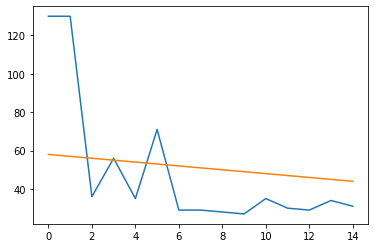

In [220]:
import matplotlib.pyplot as plt

plt.plot(predicted_RUL_test[70,:])
plt.plot(y_test[70,:])

In [ ]:
y_new = model.predict(X_test)


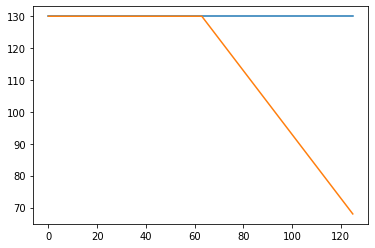

In [ ]:
import matplotlib.pyplot as plt
predicted_RUL = np.zeros((146,126))
for i in range(0,72):
  for j in range(0,126):
    predicted_RUL[i,j] = np.argmax(y_new[i,j,:])
plt.plot(predicted_RUL[71])
plt.plot(y_test[71])

In [ ]:
from keras.utils.np_utils import to_categorical
RUL_tags_test = to_categorical(y_test,131)
model.evaluate(X_test,RUL_tags_test)

3/3 [==============================] - 1s 17ms/step - loss: 1.2036


1.2035949230194092

In [225]:
#read test
data_valid = pd.read_csv('test.csv',sep=",")

In [226]:
data_valid.shape

(29820, 26)

In [227]:
data_valid.columns

Index(['Engine', 'Cycle', 'Setting 1', 'Setting 2', 'Setting 3', 'Sensor 1',
       'Sensor 2', 'Sensor 3', 'Sensor 4', 'Sensor 5', 'Sensor 6', 'Sensor 7',
       'Sensor 8', 'Sensor 9', 'Sensor 10', 'Sensor 11', 'Sensor 12',
       'Sensor 13', 'Sensor 14', 'Sensor 15', 'Sensor 16', 'Sensor 17',
       'Sensor 18', 'Sensor 19', 'Sensor 20', 'Sensor 21'],
      dtype='object')

In [228]:
#load dataset
from numpy import loadtxt
dataset = data_valid.to_numpy()
X_valid = dataset[:,1:27]
X_valid.shape

(29820, 25)

In [229]:
#let's normalize this thing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler = scaler.fit(X_valid)
#print('Min: %f, Max: %f' % (scaler.data_min_, scaler.data_max_))
# normalize the dataset and print
Xn_valid = scaler.transform(X_valid)
print(Xn_valid)

[[-1.         -0.99992382 -0.99952494 ...  1.          0.97535091
   0.96694376]
 [-0.99449036  0.19021615  0.47624703 ... -1.         -0.71448134
  -0.70868828]
 [-0.98898072 -0.99998096 -1.         ...  1.          0.97124273
   0.96309655]
 ...
 [-0.52066116 -0.0475957   0.66270784 ...  1.         -0.02088326
  -0.03819731]
 [-0.51515152 -0.04762426  0.66270784 ...  1.         -0.01882917
  -0.03304479]
 [-0.50964187 -0.04786231  0.66484561 ...  1.         -0.00787402
  -0.0183315 ]]


In [230]:
Xn_valid.shape

(29820, 25)

In [231]:
engine_old = 1
cycle_old = 1
last_cycle = []
for index, row in data_valid.iterrows():
  engine = row['Engine']
  cycle = row['Cycle']
  if engine > engine_old :
    last_cycle.append(cycle_old)
    engine_old = engine
    cycle_old = cycle
  else:
    cycle_old = cycle
last_cycle.append(data_valid['Cycle'].iloc[-1])   

In [232]:
print(last_cycle)

[54.0, 157.0, 116.0, 74.0, 218.0, 151.0, 116.0, 287.0, 167.0, 177.0, 69.0, 224.0, 248.0, 93.0, 61.0, 138.0, 95.0, 135.0, 145.0, 145.0, 215.0, 129.0, 144.0, 16.0, 76.0, 79.0, 149.0, 39.0, 117.0, 156.0, 364.0, 79.0, 80.0, 52.0, 60.0, 181.0, 165.0, 89.0, 182.0, 126.0, 112.0, 202.0, 128.0, 150.0, 136.0, 120.0, 117.0, 242.0, 149.0, 179.0, 91.0, 129.0, 167.0, 143.0, 130.0, 152.0, 77.0, 164.0, 58.0, 80.0, 148.0, 163.0, 181.0, 258.0, 55.0, 183.0, 150.0, 93.0, 121.0, 153.0, 154.0, 132.0, 123.0, 56.0, 86.0, 188.0, 203.0, 109.0, 88.0, 73.0, 150.0, 124.0, 108.0, 51.0, 194.0, 87.0, 45.0, 122.0, 189.0, 23.0, 150.0, 72.0, 110.0, 125.0, 256.0, 70.0, 25.0, 209.0, 96.0, 80.0, 187.0, 132.0, 140.0, 127.0, 138.0, 234.0, 178.0, 89.0, 181.0, 138.0, 249.0, 275.0, 136.0, 159.0, 102.0, 221.0, 191.0, 78.0, 148.0, 190.0, 82.0, 177.0, 195.0, 134.0, 75.0, 169.0, 133.0, 115.0, 100.0, 187.0, 26.0, 163.0, 93.0, 280.0, 205.0, 186.0, 108.0, 134.0, 159.0, 154.0, 168.0, 185.0, 48.0, 107.0, 169.0, 44.0, 197.0, 238.0, 204.0

In [233]:
print(min(last_cycle))

15.0


In [234]:
len(last_cycle)

218

In [235]:
counter = 0;
for i in range(len(last_cycle)):
  counter = counter + last_cycle[i]
print(counter)


29820.0


In [236]:
#need to reshape X into 3D: engine x cycle x sensor
#for fist step, keep it symmetrical and use the lowest number of cycles in dataset
#Y then becomes 
X_valid_new=np.empty(shape=(218,15,25))

#i would be number of engines
counter = 0
for i in range(0,218):
  print('i=',i)
  # j would be number of cycles
  for j in range(0,15):
    #print('j=',j)
    #k would be number of sensors
    for k in range(0,25):
      #print('k=',k)
      #print('counter',counter)
      X_valid_new[i,j,k]=Xn_valid[counter,k]

    if j == 0:
      print(counter)
      counter = counter + (int(last_cycle[i]) - 15) +1
      print(counter)
    else: 
      counter = counter + 1
    if (j == 14):
      print(counter)

i= 0
0
40
54
i= 1
54
197
211
i= 2
211
313
327
i= 3
327
387
401
i= 4
401
605
619
i= 5
619
756
770
i= 6
770
872
886
i= 7
886
1159
1173
i= 8
1173
1326
1340
i= 9
1340
1503
1517
i= 10
1517
1572
1586
i= 11
1586
1796
1810
i= 12
1810
2044
2058
i= 13
2058
2137
2151
i= 14
2151
2198
2212
i= 15
2212
2336
2350
i= 16
2350
2431
2445
i= 17
2445
2566
2580
i= 18
2580
2711
2725
i= 19
2725
2856
2870
i= 20
2870
3071
3085
i= 21
3085
3200
3214
i= 22
3214
3344
3358
i= 23
3358
3360
3374
i= 24
3374
3436
3450
i= 25
3450
3515
3529
i= 26
3529
3664
3678
i= 27
3678
3703
3717
i= 28
3717
3820
3834
i= 29
3834
3976
3990
i= 30
3990
4340
4354
i= 31
4354
4419
4433
i= 32
4433
4499
4513
i= 33
4513
4551
4565
i= 34
4565
4611
4625
i= 35
4625
4792
4806
i= 36
4806
4957
4971
i= 37
4971
5046
5060
i= 38
5060
5228
5242
i= 39
5242
5354
5368
i= 40
5368
5466
5480
i= 41
5480
5668
5682
i= 42
5682
5796
5810
i= 43
5810
5946
5960
i= 44
5960
6082
6096
i= 45
6096
6202
6216
i= 46
6216
6319
6333
i= 47
6333
6561
6575
i= 48
6575
6710
6724
i= 49
67

In [ ]:
print(last_cycle)

[54.0, 157.0, 116.0, 74.0, 218.0, 151.0, 116.0, 287.0, 167.0, 177.0, 69.0, 224.0, 248.0, 93.0, 61.0, 138.0, 95.0, 135.0, 145.0, 145.0, 215.0, 129.0, 144.0, 16.0, 76.0, 79.0, 149.0, 39.0, 117.0, 156.0, 364.0, 79.0, 80.0, 52.0, 60.0, 181.0, 165.0, 89.0, 182.0, 126.0, 112.0, 202.0, 128.0, 150.0, 136.0, 120.0, 117.0, 242.0, 149.0, 179.0, 91.0, 129.0, 167.0, 143.0, 130.0, 152.0, 77.0, 164.0, 58.0, 80.0, 148.0, 163.0, 181.0, 258.0, 55.0, 183.0, 150.0, 93.0, 121.0, 153.0, 154.0, 132.0, 123.0, 56.0, 86.0, 188.0, 203.0, 109.0, 88.0, 73.0, 150.0, 124.0, 108.0, 51.0, 194.0, 87.0, 45.0, 122.0, 189.0, 23.0, 150.0, 72.0, 110.0, 125.0, 256.0, 70.0, 25.0, 209.0, 96.0, 80.0, 187.0, 132.0, 140.0, 127.0, 138.0, 234.0, 178.0, 89.0, 181.0, 138.0, 249.0, 275.0, 136.0, 159.0, 102.0, 221.0, 191.0, 78.0, 148.0, 190.0, 82.0, 177.0, 195.0, 134.0, 75.0, 169.0, 133.0, 115.0, 100.0, 187.0, 26.0, 163.0, 93.0, 280.0, 205.0, 186.0, 108.0, 134.0, 159.0, 154.0, 168.0, 185.0, 48.0, 107.0, 169.0, 44.0, 197.0, 238.0, 204.0

In [ ]:
print(len(last_cycle))

218


In [ ]:
list_of_columns = data.columns

In [ ]:
data.columns

Index(['Engine', 'Cycle', 'Setting 1', 'Setting 2', 'Setting 3', 'Sensor 1',
       'Sensor 2', 'Sensor 3', 'Sensor 4', 'Sensor 5', 'Sensor 6', 'Sensor 7',
       'Sensor 8', 'Sensor 9', 'Sensor 10', 'Sensor 11', 'Sensor 12',
       'Sensor 13', 'Sensor 14', 'Sensor 15', 'Sensor 16', 'Sensor 17',
       'Sensor 18', 'Sensor 19', 'Sensor 20', 'Sensor 21'],
      dtype='object')

In [237]:
RUL_tags_valid = model.predict(X_valid_new)



In [238]:
RUL_tags_valid.shape

(218, 15, 131)

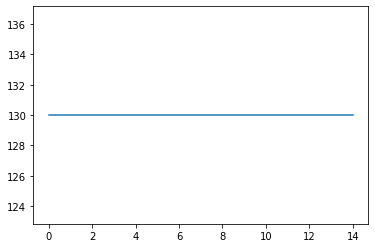

In [249]:
#let's look at the predictions
predicted_RUL = np.zeros((218,15))
for i in range(0,218):
  for j in range(0,15):
    predicted_RUL[i,j] = np.argmax(RUL_tags_valid[i,j,:])


plt.plot(predicted_RUL[10])

In [255]:
#let's get the last elements
last_element = []
for i in range(len(predicted_RUL)):
  ylen = len(predicted_RUL[i])
  #print(ylen)
  y = predicted_RUL[i]
  a = y[ylen-1] 
  #print(a)
  last_element.append(int(a))

In [251]:
print(last_element)

[17, 25, 41, 130, 12, 63, 16, 7, 130, 51, 130, 2, 11, 130, 130, 28, 29, 130, 130, 42, 13, 130, 48, 130, 130, 41, 33, 130, 53, 41, 8, 130, 130, 130, 130, 11, 18, 130, 0, 130, 42, 3, 10, 19, 29, 15, 18, 16, 130, 57, 130, 130, 42, 32, 130, 51, 130, 17, 130, 46, 5, 45, 22, 16, 130, 18, 28, 29, 45, 42, 28, 10, 45, 130, 29, 9, 28, 130, 130, 130, 2, 51, 45, 130, 20, 130, 130, 42, 17, 130, 17, 130, 130, 55, 1, 45, 130, 6, 46, 41, 4, 21, 46, 28, 53, 16, 10, 21, 15, 20, 8, 13, 130, 16, 45, 6, 2, 130, 17, 31, 130, 16, 8, 8, 130, 130, 17, 65, 22, 10, 130, 48, 130, 8, 31, 24, 45, 18, 6, 19, 18, 10, 130, 130, 36, 130, 65, 29, 13, 130, 130, 16, 19, 17, 41, 130, 33, 130, 28, 13, 16, 16, 6, 130, 66, 130, 51, 130, 32, 45, 19, 42, 21, 42, 42, 130, 13, 13, 13, 44, 130, 31, 51, 130, 130, 130, 19, 130, 3, 130, 17, 13, 130, 14, 7, 16, 45, 10, 19, 6, 71, 1, 22, 29, 130, 130, 9, 17, 28, 130, 52, 15, 36, 4, 130, 130, 130, 22]


In [252]:
len(last_element)

218

In [256]:
#let's get the lowest element
lowest_element = []
for i in range(len(predicted_RUL)):
  lowest_element.append(min(predicted_RUL[i]))

In [257]:
print(lowest_element)

[15.0, 23.0, 41.0, 130.0, 12.0, 42.0, 16.0, 7.0, 66.0, 35.0, 130.0, 2.0, 11.0, 130.0, 130.0, 27.0, 29.0, 130.0, 130.0, 35.0, 11.0, 45.0, 47.0, 130.0, 130.0, 37.0, 33.0, 130.0, 36.0, 41.0, 8.0, 130.0, 130.0, 130.0, 130.0, 11.0, 18.0, 130.0, 0.0, 130.0, 42.0, 3.0, 9.0, 17.0, 28.0, 15.0, 18.0, 12.0, 103.0, 53.0, 130.0, 130.0, 42.0, 20.0, 130.0, 51.0, 130.0, 17.0, 130.0, 41.0, 5.0, 41.0, 17.0, 11.0, 130.0, 17.0, 28.0, 29.0, 45.0, 42.0, 28.0, 10.0, 45.0, 130.0, 29.0, 9.0, 22.0, 130.0, 130.0, 130.0, 2.0, 42.0, 45.0, 130.0, 20.0, 130.0, 130.0, 42.0, 17.0, 130.0, 17.0, 130.0, 130.0, 42.0, 1.0, 45.0, 130.0, 6.0, 46.0, 41.0, 4.0, 21.0, 46.0, 28.0, 46.0, 16.0, 10.0, 21.0, 15.0, 17.0, 8.0, 10.0, 130.0, 12.0, 42.0, 6.0, 2.0, 130.0, 17.0, 28.0, 130.0, 10.0, 8.0, 8.0, 130.0, 130.0, 16.0, 45.0, 22.0, 9.0, 130.0, 35.0, 130.0, 8.0, 22.0, 21.0, 44.0, 18.0, 6.0, 17.0, 18.0, 10.0, 130.0, 130.0, 36.0, 130.0, 51.0, 29.0, 10.0, 130.0, 130.0, 13.0, 12.0, 16.0, 41.0, 130.0, 31.0, 130.0, 22.0, 13.0, 5.0, 16.0, 6

In [258]:
with open('lmst_last.txt', 'w') as filehandle:
    for item in last_element:
        filehandle.write('%s\n' % item)

In [260]:
with open('lmst_lowest.txt', 'w') as filehandle:
    for item in lowest_element:
        filehandle.write('%s\n' % item)

In [ ]:
#read test
data = pd.read_csv('train_rul.csv',sep=",")

In [ ]:
engine_old = 1
cycle_old = 1
last_cycle = []
for index, row in data.iterrows():
  engine = row['Engine']
  cycle = row['Cycle']
  if engine > engine_old :
    last_cycle.append(cycle_old)
    engine_old = engine
    cycle_old = cycle
  else:
    cycle_old = cycle

In [ ]:
last_cycle.append(data['Cycle'].iloc[-1])